In [1]:
print("yessss")

yessss


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_align = pd.read_csv("/home/asif/tts_all/NISQA_imp/output/all_predictions_tts_naturalness_align.csv")
df_fs2 = pd.read_csv("/home/asif/tts_all/NISQA_imp/output/all_predictions_tts_naturalness_fs2.csv")
df_glow = pd.read_csv("/home/asif/tts_all/NISQA_imp/output/all_predictions_tts_naturalness_glow.csv")
df_vit = pd.read_csv("/home/asif/tts_all/NISQA_imp/output/all_predictions_tts_naturalness_vits.csv")
df_gt = pd.read_csv("/home/asif/tts_all/NISQA_imp/output/all_predictions_tts_naturalness_gt.csv")

In [3]:
df_align['model'] = "align"
df_fs2['model'] = "fs2"
df_glow['model'] = "glow"
df_vit['model'] = "vit"
df_gt['model'] = "gt"

In [4]:
concatenated_df = pd.concat([df_align, df_fs2, df_glow, df_vit, df_gt], ignore_index=True)

In [5]:
concatenated_df

,deg,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model
0,align1.wav,2.793453,NaN,NaN,NaN,NaN,align
1,align2.wav,3.110360,NaN,NaN,NaN,NaN,align
2,fs21.wav,3.017715,NaN,NaN,NaN,NaN,fs2
3,fs22.wav,2.775021,NaN,NaN,NaN,NaN,fs2
4,glow1.wav,2.738521,NaN,NaN,NaN,NaN,glow
5,glow2.wav,3.542400,NaN,NaN,NaN,NaN,glow
6,vits1.wav,3.442938,NaN,NaN,NaN,NaN,vit
7,vits2.wav,3.491629,NaN,NaN,NaN,NaN,vit
8,gt_1.wav,3.727593,NaN,NaN,NaN,NaN,gt
9,gt_2.wav,3.716085,NaN,NaN,NaN,NaN,gt


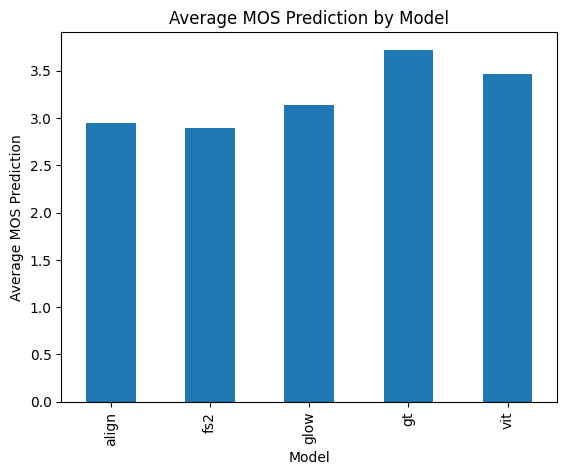

In [6]:
df = concatenated_df

# Group the data by 'model' and calculate the mean for 'mos_pred'
grouped = df.groupby('model')['mos_pred'].mean()

# Create a bar plot
grouped.plot(kind='bar', title='Average MOS Prediction by Model')
plt.xlabel('Model')
plt.ylabel('Average MOS Prediction')
plt.show()

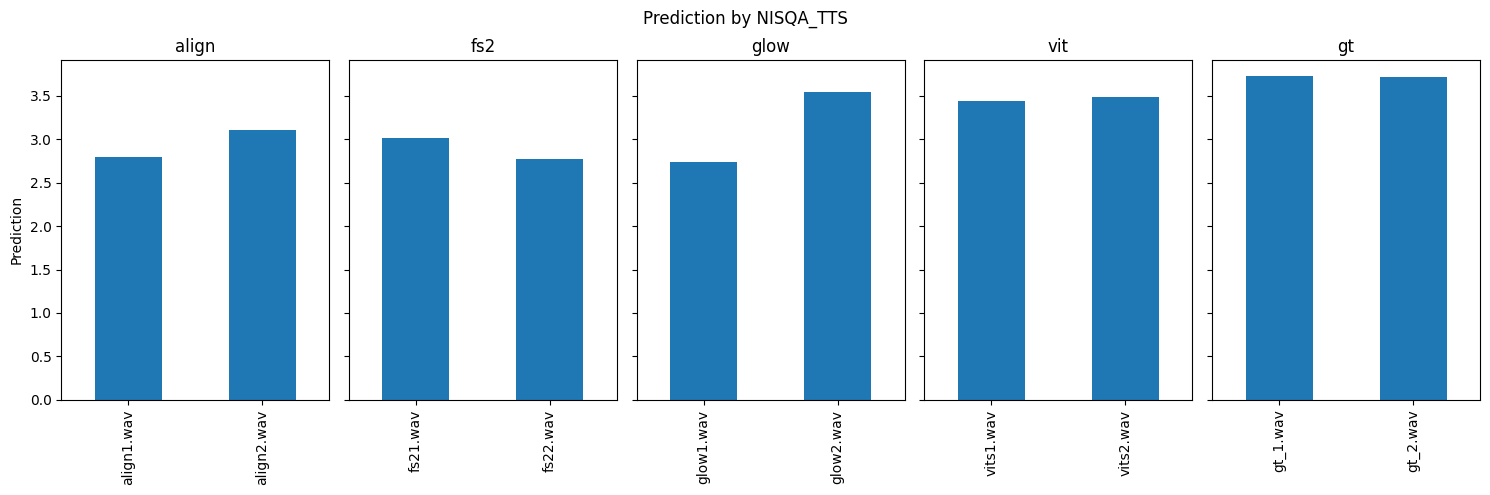

In [11]:
# Filter out columns with NaN values
df = df.dropna(axis=1, how='all')

# Define the models
models = df['model'].unique()

# Create subplots
fig, axs = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)
fig.suptitle('Prediction by NISQA_TTS')

# Create side-by-side bar plots for each model
for i, model in enumerate(models):
    model_data = df[df['model'] == model]
    model_data.set_index('deg').plot(kind='bar', ax=axs[i], legend=False)
    axs[i].set_title(model)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Prediction')

# plt.show()


# Adjust the layout
fig.tight_layout()
fig.subplots_adjust(top=0.88)  # Adjust the top space to accommodate the suptitle

# Save the figure
fig.savefig('/home/asif/tts_all/NISQA_imp/output/nisqa_prediction_plot.pdf')

plt.show()


In [13]:
# concatenated_df
concatenated_df = concatenated_df.drop(columns=["noi_pred","dis_pred","col_pred","loud_pred"])

In [14]:
# Save the filtered dataframe as a CSV file
concatenated_df.to_csv('/home/asif/tts_all/NISQA_imp/output/nisqa_tts_models.csv', index=False)

In [6]:
df_qa = pd.read_csv("/home/asif/tts_all/NISQA_imp/output/all_predictions_full_create.csv")

In [6]:
df_qa

,deg,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model
0,216b5bfa-b8c2-4bd7-81bf-061c117936f6_0.flac,4.102833,4.163169,4.462114,4.120887,3.749644,NISQAv2
1,fb4449d8-08e5-46dc-aaf6-1c53c00d1b77_0.flac,4.878630,4.652976,4.717444,4.497988,4.683146,NISQAv2
2,8e6c12c5-c7af-41e7-9dda-7e2fc0e94a9e_0.flac,3.667887,3.804682,4.261823,3.782618,3.443118,NISQAv2
3,3f58cdb3-2d9b-4e8f-8858-d7575809b9b1_0.flac,3.226026,3.609781,3.713922,3.894310,3.790318,NISQAv2
4,eb41ea60-bac8-44f2-9e7c-a9daed8d251e_0.flac,4.722540,4.381672,4.757727,4.582271,4.560126,NISQAv2
...,...,...,...,...,...,...,...
88920,502d0958-770a-416a-96d4-6c65d85a3c00_0.flac,2.754953,3.765305,2.512199,3.200686,3.607286,NISQAv2
88921,0cc58da4-8585-4a87-91b8-93c3dc6ce689_0.flac,2.530868,2.978154,3.773749,3.558587,3.651992,NISQAv2
88922,e3a0281e-9a52-4233-ad7d-c4019666b09c_0.flac,3.097073,3.701123,3.073619,3.248746,3.706317,NISQAv2
88923,6f1468d0-3200-499a-bf10-53ab1e41a1e8_0.flac,4.309418,3.776845,4.398810,3.911789,3.982651,NISQAv2


In [7]:
df_qa.rename(columns={'deg':'id'},inplace=True) ## rename to match other dfs
df_qa['id'] = df_qa['id'].apply(lambda x:x.split('.')[0])  ## remove .wav
df_qa.sort_values('mos_pred',ascending=True,inplace=True) ## sort by mean overall score
df_qa.head()

,id,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model
2181,15279a87-ad30-454c-aea3-7a04157bb045_0,0.632934,2.029957,2.187732,1.681198,1.144145,NISQAv2
65943,2841659c-59bd-4d7e-bb88-32600aee197a_0,0.864993,1.854636,1.661471,1.265151,1.999609,NISQAv2
26737,38e1c044-5371-441d-bb0f-24b0f4836d44_0,1.050477,3.017431,2.082255,1.872236,2.111037,NISQAv2
72992,454c5d54-71cd-47d2-b71d-4f5e65f2517f_0,1.087819,1.939764,2.096174,1.819832,2.499362,NISQAv2
19813,c9050d21-8efb-45c2-ad48-7ee47462bc9a_0,1.089666,1.575126,3.484047,1.619475,1.583535,NISQAv2


<Axes: >

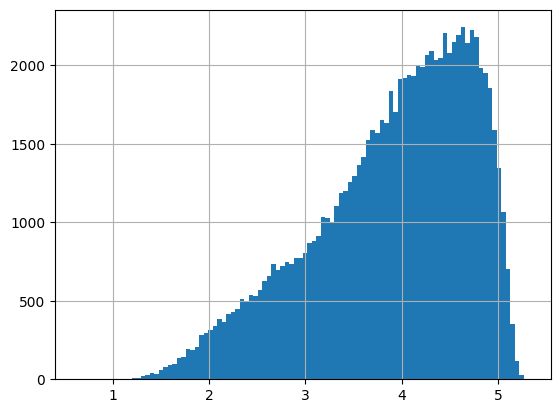

In [8]:
df_qa['mos_pred'].hist(bins=100)

In [2]:
!conda env list

# conda environments:
#
base                     /home/asif/miniconda3
fairseq_env              /home/asif/miniconda3/envs/fairseq_env
nisqa                    /home/asif/miniconda3/envs/nisqa
oldfs2                   /home/asif/miniconda3/envs/oldfs2
olive-env                /home/asif/miniconda3/envs/olive-env
prodiffenv               /home/asif/miniconda3/envs/prodiffenv
prodiffenvpy3_10         /home/asif/miniconda3/envs/prodiffenvpy3_10
prodiffenvpython3_10     /home/asif/miniconda3/envs/prodiffenvpython3_10
punc_res_3_7             /home/asif/miniconda3/envs/punc_res_3_7
py37                     /home/asif/miniconda3/envs/py37
py3_9                    /home/asif/miniconda3/envs/py3_9
py3_env                  /home/asif/miniconda3/envs/py3_env
test_py_3_7              /home/asif/miniconda3/envs/test_py_3_7
test_py_3_8              /home/asif/miniconda3/envs/test_py_3_8
whisper               *  /home/asif/miniconda3/envs/whisper



In [3]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.4 MB/s eta 0:00:00a 0:00:01m
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be f

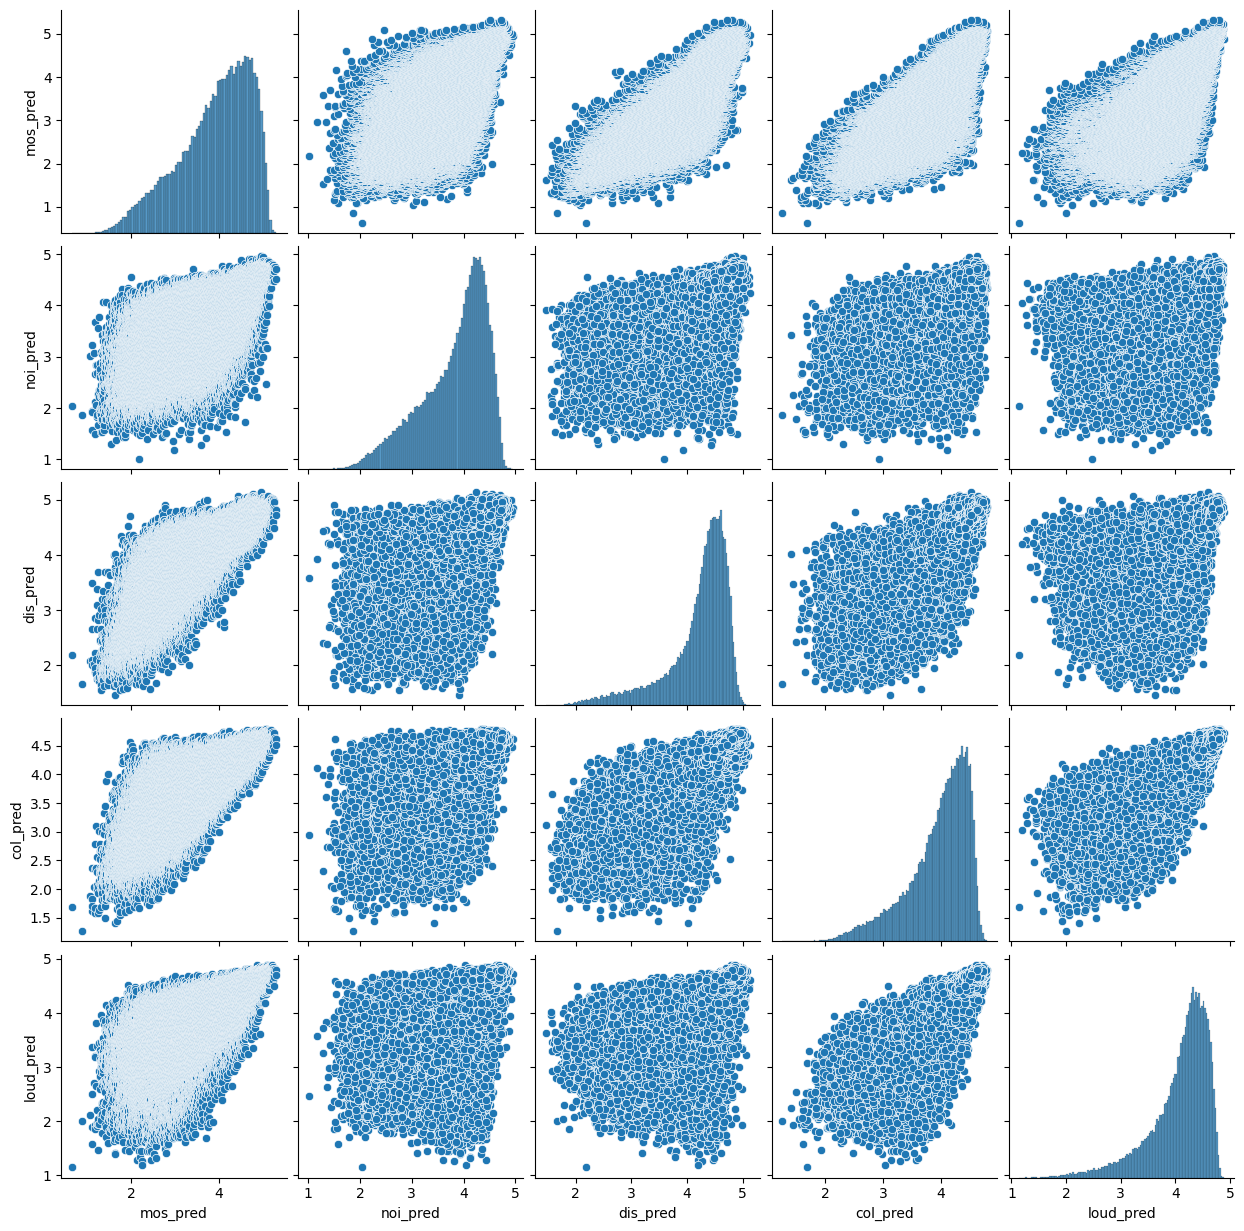

In [10]:
import seaborn
seaborn.pairplot(df_qa)
# to show
plt.show()